<a href="https://colab.research.google.com/github/ryanmcmanamon1/computational_physics/blob/main/Copy_of_Ryan_McManamon_09_Lab05_SHM_mass_spring_2025_ipynb_on_2025_02_24_16_45_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectations for All Notebooks
* Be sure to read instructions carefully and answer all questions.
* Use formatted printing and descriptive print statements
* You must include comment strings for all functions
* ALL PLOTS NEED LABELS ON X AND Y AXES
* If more than one data set is plotted, you must include a legend.
* Plot discrete data with points rather than a line.
```python
plt.plot(x, y, 'bs')
```
or
```python
plt.scatter(x,y)
```

# Overview

### Part 1: Visualize Data and Determine Analytic Solution
* Plot data of mass oscillating on a spring
* determine the analytic solution
* check your answer with me!

### Part 2: Model Motion with the Euler Method
* Implement the Euler method
* Compare Euler solution with your analytic solution
* Plot the energy of the Euler solution vs time.

### Part 3: Model Motion with the Euler-Cromer Method
* Implement the Euler-Cromer method
* Compare Euler-Cromer solution with your analytic solution
* Plot the energy of the Euler solution vs time.


# Part 1: Visualize Data and Plot Solution for Simple Harmonic Oscillator

* We will visualize data for the position of a mass oscillating on a spring as a function of time.

* The general solution to describe the motion of a mass oscillating on a spring is
$$ x(t) = A cos(\omega t - \phi) $$

* Describe the meaning of each term in the table below: (2 points)

| Symbol | Name |Units | Description |
|----------|----|------|-----|
| x        | position | m | position of mass |
| A        | amplitude   | m | the maximum displacement from the equilibrium point |
| $\omega$ |  angular frequency  | rad/s | the frequency of phase argument |
| $\phi$   |  phase constant  | rad | phase shift of the function |

### 0. Import modules

In the cell below, import numpy and matplotlib

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt


### 1. Transfer Data and Import Data Into Colab

(5 points)

* We will use `wget` to transfer data from github.
* We need to first install `wget` using `pip`.
* We can then read the data in and create a plot of position vs time.



In [ ]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7628ae1832f62927c5ab465cbf391c1e09cc7df6f41820dba3931916a27a89d3
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
!wget https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv


--2025-02-24 19:33:45--  https://raw.githubusercontent.com/rfinn/computational_physics/refs/heads/main/data/shm_mass_spring_good.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619 (7.4K) [text/plain]
Saving to: ‘shm_mass_spring_good.csv’

shm_mass_spring_goo 100%[===================>]   7.44K  --.-KB/s    in 0s      

2025-02-24 19:33:45 (71.2 MB/s) - ‘shm_mass_spring_good.csv’ saved [7619/7619]



In [ ]:
# use astropy to read in your data file
from astropy.io import ascii
data = ascii.read("shm_mass_spring_good.csv",delimiter=',')

In [ ]:
# print data so you can see the column names
print(data)


Time(s)    Position(m)        Velocity(m/s)      Acceleration(m/s²) 
------- ------------------ -------------------- --------------------
    0.0 0.7541000247001648  -0.3215557336807251 -0.15655027495490179
   0.05 0.7390000224113464  -0.3373613953590393  0.14201297804161353
    0.1 0.7200999855995178 -0.33523350954055786   0.7024558274834244
   0.15 0.7026000022888184 -0.27916669845581055    1.463993427194195
    0.2 0.6905999779701233 -0.18211093213823107    2.121455231566488
   0.25 0.6830000281333923 -0.05294422308603924    2.457720887513809
    0.3 0.6851000189781189  0.08227772182888456    2.372621073399061
   0.35 0.6926000118255615  0.19272204902436996    2.012962286854967
    0.4 0.7042999863624573  0.29349995983971483   1.3467592773614105
   0.45 0.7232000231742859   0.3537221087349786  0.16296279651147347
    ...                ...                  ...                  ...
   4.55 0.7423999905586243  -0.3024443321757852  -0.8412653465329787
    4.6 0.7232000231742859 -0.3208

* Save the time and position variables as more conveniently named arrays
* Subtract the average from the position

In [ ]:
# save the time and position data
time = data['Time(s)']
position = data['Position(m)']
velocity = data['Velocity(m/s)']
# subtract the mean of the position from the position
mean_pos = np.mean(position)
position = position - mean_pos



### 3. Visualize and Analyze The Data

(5 points)

### Plot Your Data
* Make a plot of position vs. time using matplotlib.

Text(0.5, 1.0, 'Position vs. Time')

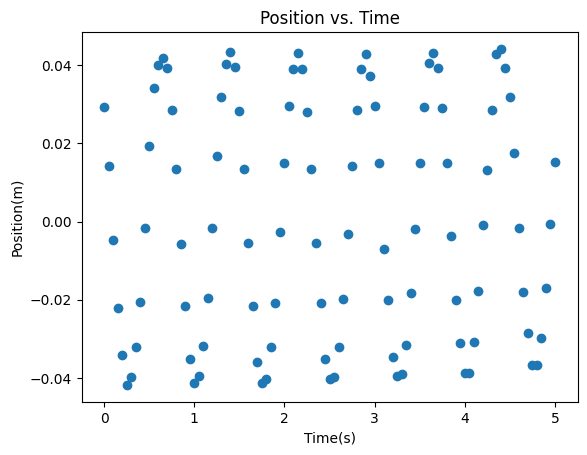

In [ ]:
# code to plot your position vs time data here
plt.figure()
plt.scatter(time,position)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Position vs. Time')

#### Determine Parameters of Analytic Solution



* From your plot of position vs time, you should be to estimate the amplitude $A$ and the period $T$ of the motion.

* Briefly describe how you measured these values, and enter your values in the cell below.



In [ ]:
# values of period and amplitude from the graph

A = 0.0425 # amplitude in m (farthest away from equilibrium)
T = 0.75 # period in sec (peak to peak)


##### Calculate $\omega$

In the cell below, calculate $\omega$ from your measured value of the period.

In [ ]:
# calculate omega

omega = 2*np.pi/T
print(omega)

8.377580409572781


#### Plot the Data and the Analytic Solution

(5 points)

* Copy your code for plotting the position versus time
* Add code to overplot the analytic solution on the same figure.

* Determine the best value of $\phi$ using trial and error.


In [ ]:
# write a function to calculate the position of the SHO
# input = A, omega, phi, t
# return = position
def calculate_position(A,omega,phi,t_analytic):
  y = A*np.cos(omega*t_analytic - phi)
  return y
t_analytic = np.linspace(0,5,101)
phi = -np.pi/4
analytic_pos = calculate_position(A,omega,phi,t_analytic)



Text(0.5, 1.0, 'Position vs. Time')

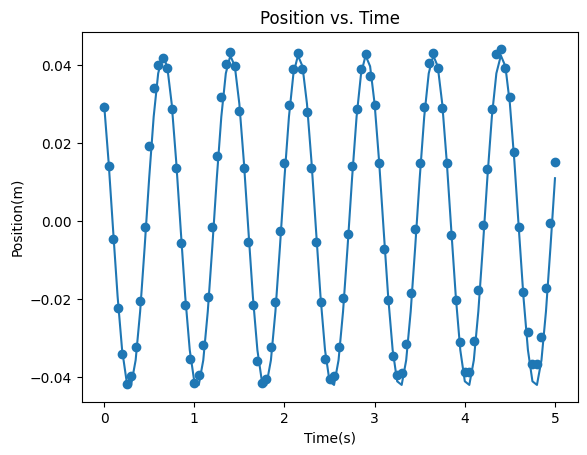

In [ ]:
# enter your code to plot your data and analytic solution
# be sure to use your function
plt.figure()
plt.scatter(time,position)
plt.plot(time,analytic_pos)
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title("Position vs. Time")




### 4. Record the initial position and velocity

(5 points)

* Use a formatted print statement to display the initial position and velocity of the mass oscillating on a spring. Enter your values in the Table below.
* Enter the value for the angular frequency, $\omega$.
* Enter the value for the spring constant, $k$, divided by the mass, $\omega$.

| Parameter | Value |
|--|--|
|$x_0$ |0.02933467673783252 |
|$v_0$ |-0.3215557336807251|
| $\omega$ |8.377580409572781 |
| $k/m$ |70.18385351885765|

In [ ]:
print(f'x0 = {position[0]}')
print(f'v0 = {velocity[0]}')
print(f'omega = {omega}')
print(f'k/m = {omega**2}')


x0 = 0.02933467673783252
v0 = -0.3215557336807251
omega = 8.377580409572781
k/m = 70.18385351885765


# Part 2 - Model Motion with Euler Method

*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

### Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $x$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [ ]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k,m,x):
  """
  description:
calculates acceleration using Hooke's Law

  parameters:
spring constant, k
mass, m
displacemet from equilibrium, x

  return:
  acceleration, a
  """
  # your code here
  a = -k*x/m
  return a



### Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [ ]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0,v0,tmax,dt):
  """
  description:
calculates number of steps given the total time and dt. Initializes x positiion
and velocity arrays
  parameters:
initial x position, x0
initial velocity, v0
tmax
dt
  return:
time, position, velocity

  """
  nsteps = int(tmax/dt)
  t = np.zeros(nsteps)
  x = np.zeros(nsteps)
  v = np.zeros(nsteps)
  x[0] = x0
  v[0] = v0
  return t,x,v


### Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [ ]:
# write your calculate function here
def calculate(t,x,v,k,m,dt):
  """
  description:
calculates the position and velcoity using euler method
  parameters:
time, t
position, x
velcity, v
spring constant, k
mass, m
time step, dt
  return:
  time, position, velocity
  """
  # your code here
  for i in range(1,len(t)):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + acceleration(k,m,x[i-1])*dt
    x[i] = x[i-1] + v[i-1]*dt
  return t,x,v



### Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


<ipython-input-178-9bad5e5de18d>:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


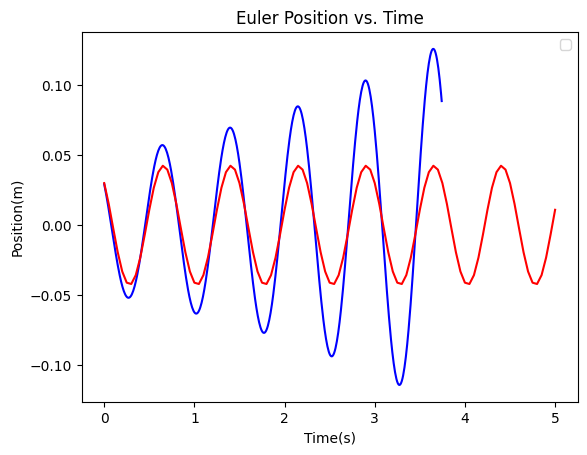

In [ ]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.02933467673783252
vx0 = -0.3215557336807251

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.0425
m = 150
k = m*omega**2

# Enter the period you determined from Part 1
T = 0.75
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T


# call initialize
t,x,v = initialize(x0,vx0,tmax,dt)


# call calculate
t,x,v = calculate(t,x,v,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure()
plt.plot(t,x,color ='b')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Euler Position vs. Time')


# overplot your analytic solution from Part 1
plt.plot(time,analytic_pos,color = 'r')
plt.legend()



### Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions.
1. (2 points) Does your Euler solution conserve energy? Explain.
- No, as time progesses, the euler solution begins to loose its fit. Meaning, the energy  increases and therefore is not conserved to countinue harmonic motion.
1. (2 points) Is the Euler method a good approach for modeling oscillatory motion? Explain.
- No, the Euler method does not accurately show the conservation of energey in oscillatory motion.

Text(0.5, 1.0, 'Energy vs. Time')

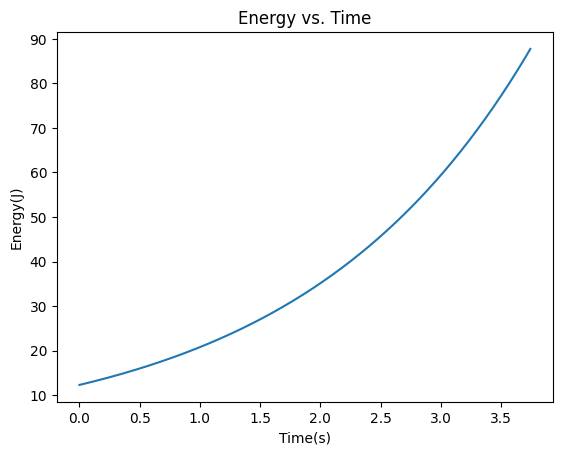

In [ ]:
# Your plot of energy vs time here
E = 1/2*m*v**2 + 1/2*k*x**2
plt.figure()
plt.plot(t,E)
plt.xlabel('Time(s)')
plt.ylabel('Energy(J)')
plt.title('Energy vs. Time')


# Part 3 - Model Motion with the Euler-Cromer Method

* Copy your calculate function below, but call it `euler_cromer_calculate`
* (5 points) Adjust the code so that:
  * you calculate $v_{i}$ before  $x_{i}$
  * you use $v_{i}$ instead of $v_{i-1}$ when calculating $x_{i}$.
* (5 points) Replot the position vs time.
* (5 points) Replot total energy vs time.


**Questions**

Briefly answer the following questions.
1. (2 points) What is different about the Euler vs Euler-Cromer method?  Which is better to use when modeling simple harmonic motion?
- The Euler-Cromer method calculates the velocity before the position and uses the initial velocity to calculate position rather than v[i-1]. The reults is a more accurate representation of the conservation of energy in oscillatory motion.
1. (2 points) Does the Euler-Cromer solution conserve energy? Justify your answer.
- Yes, in the graph, the amplitude does not get larger or smaller, it oscilates between its min and max values.

In [ ]:
# your euler_cromer_calculate

def euler_cromer_calculate(t,x,v,k,m,dt):
  """
  description:
calculates the time, position, and velcoity, using v[1] rather than v[i-1]
  parameters:
time, t
position, x
velocity, v
spring constant, k
mass, m
time step, dt
  return:
  """
  for i in range(1,len(t)):
    t[i] = t[i-1] + dt
    v[i] = v[i-1] + acceleration(k,m,x[i-1])*dt
    x[i] = x[i-1] + v[i]*dt
  return t,x,v

<ipython-input-191-5354144a638c>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


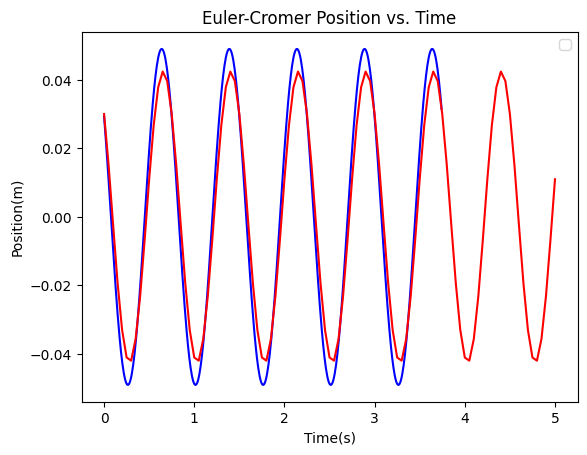

In [ ]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.02933467673783252
vx0 = -0.3215557336807251

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.0425
m = .15
k = m*omega**2

# Enter the period you determined from Part 1
T = 0.75
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T


# call initialize
tcromer,xcromer,vcromer = initialize(x0,vx0,tmax,dt)


# call calculate
tcromer,xcromer,vcromer = euler_cromer_calculate(t,x,v,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure()
plt.plot(tcromer,xcromer,color ='b')
plt.xlabel('Time(s)')
plt.ylabel('Position(m)')
plt.title('Euler-Cromer Position vs. Time')


# overplot your analytic solution from Part 1
plt.plot(time,analytic_pos,color='r')
plt.legend()






(0.01, 0.015)

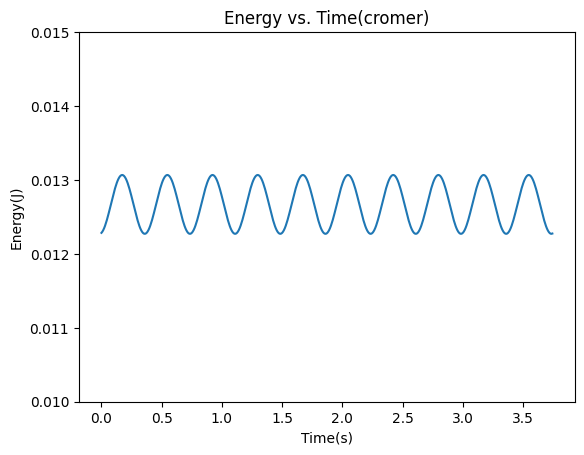

In [ ]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here
E = 1/2*m*v**2 + 1/2*k*x**2
plt.figure()
plt.plot(t,E)
plt.xlabel('Time(s)')
plt.ylabel('Energy(J)')
plt.title('Energy vs. Time(cromer)')
plt.ylim(0.01,0.015)



### Plot Speed vs Position

(5 points)

* Make a plot of $v_x$ versus $x$.
  * Use the scatter command, and color code your points by the time
  ```python
  plt.scatter(x, vx, c=time)
  ```
* Interpret your results. What does the graph of velocity vs. position show?

Text(0.5, 1.0, 'Position(cromer) vs. Velocity(cromer)')

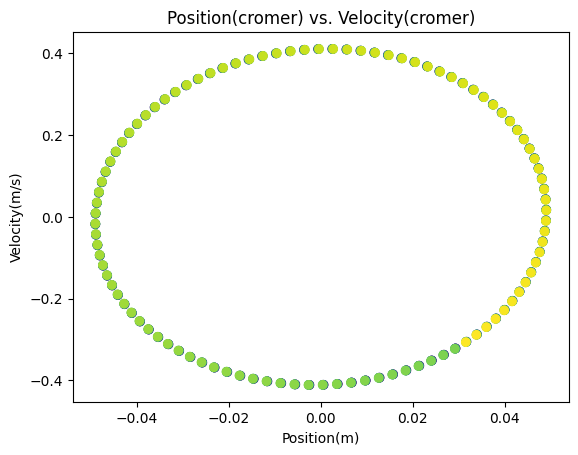

In [ ]:
plt.figure()
plt.scatter(xcromer, vcromer, c=tcromer)
plt.ylabel('Velocity(m/s)')
plt.xlabel('Position(m)')
plt.title('Position(cromer) vs. Velocity(cromer)')
# This graph shows the periodic nature of the velocity and position of the oscillatory motion.
# As the position increases the velocity decreses and vice versa.

# Bonus

(5 points)

Adapt your Euler-Cromer method to include a damping force with the form:

$$F_{damping} = - b v_x$$


Test different values of $q$ to reproduce Figure 3.4 in the text.
